In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

# Datasource: US Census.gov

### - Employment data by County
#### -- county (county/state)
#### -- labor_force
#### -- employed
#### -- unemployed_pct

### - Demographic population and race data by County

#### -- county (county/state)
#### -- population
#### -- race_white
#### -- race_black
#### -- race_native
#### -- race_asian
#### -- race_islander
#### -- race_other
#### -- race_two_or_more

---

# This model uses these X columns:
---
#### - race_white
#### - race_black
#### - race_asian
#### - race_other (combined race_other, race_islander, race_native)
#### - race_two_or_more

---

## To Predict one of these Y column:

# labor_force
# employed
# unemployed

---

There are sample tests way at the bottom that simulates simulate the response the user would get if we were to provide them with a form for them to enter in values and hit submit. 

The tests below shows you the "change" in labor_force.


---

In [65]:
employment_county_df  = pd.read_csv('../data_files/Employment_by_County.csv', index_col=0)
employment_county_df.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more
geoid,,,,,,,,,,,,,
1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157
1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024
1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700
1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759
1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656


# Copy of the dataframe to feed ML 



In [66]:
employment_county_copy = employment_county_df.copy()

In [67]:
employment_county_copy.columns.to_list()

['county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_native',
 'race_asian',
 'race_islander',
 'race_other',
 'race_two_or_more']

In [68]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 1001 to 56045
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            3125 non-null   object 
 1   labor_force       3125 non-null   int64  
 2   employed          3125 non-null   int64  
 3   unemployed        3125 non-null   int64  
 4   unemployed_pct    3125 non-null   float64
 5   population        3125 non-null   int64  
 6   race_white        3125 non-null   int64  
 7   race_black        3125 non-null   int64  
 8   race_native       3125 non-null   int64  
 9   race_asian        3125 non-null   int64  
 10  race_islander     3125 non-null   int64  
 11  race_other        3125 non-null   int64  
 12  race_two_or_more  3125 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 341.8+ KB


In [69]:
employment_county_copy['race_others']= employment_county_copy[['race_native','race_islander','race_other']].sum(axis=1)
employment_county_copy.head(5)

,county,labor_force,employed,unemployed,unemployed_pct,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,race_others
geoid,,,,,,,,,,,,,,
1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,1162
1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,7060
1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,1156
1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,534
1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,3792


In [70]:
# reducing columns to improve model performance 
employment_county_copy = employment_county_copy.drop(['race_native','race_islander','race_other'],axis=1)

In [71]:
employment_county_copy.isnull().values.any()

False

In [72]:
employment_county_copy.shape

(3125, 11)

In [73]:
employment_county_copy.columns.to_list()

['county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed_pct',
 'population',
 'race_white',
 'race_black',
 'race_asian',
 'race_two_or_more',
 'race_others']

In [74]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 1001 to 56045
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   county            3125 non-null   object 
 1   labor_force       3125 non-null   int64  
 2   employed          3125 non-null   int64  
 3   unemployed        3125 non-null   int64  
 4   unemployed_pct    3125 non-null   float64
 5   population        3125 non-null   int64  
 6   race_white        3125 non-null   int64  
 7   race_black        3125 non-null   int64  
 8   race_asian        3125 non-null   int64  
 9   race_two_or_more  3125 non-null   int64  
 10  race_others       3125 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 293.0+ KB


# Targeting "labor_force" but we can target any of the employment columns

- labor_force
- employed
- unemployed_pct

In [75]:
X = employment_county_copy[['race_white', 'race_black', 'race_asian', 'race_two_or_more', 'race_others']]
y = employment_county_copy['unemployed'] 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [77]:
model = RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [78]:
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9208485402280945

In [80]:
model.score(X_train,y_train)

0.9300568140070107

In [81]:
model.score(X_test,y_test)

0.9208485402280945

In [82]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

807.2108800000001

## Feature importance

In [83]:
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.31313917769364513, 'race_white'),
 (0.20811900505711378, 'race_others'),
 (0.20096570924356402, 'race_two_or_more'),
 (0.16777759355891686, 'race_asian'),
 (0.1099985144467602, 'race_black')]

### MAE seem a bit high, but consider the min max range

In [84]:
max_labor_force = employment_county_df['labor_force'].max()
min_labor_force = employment_county_df['labor_force'].min()
print ('min = ', min_labor_force)
print('max = ', max_labor_force)

min =  184
max =  4921499


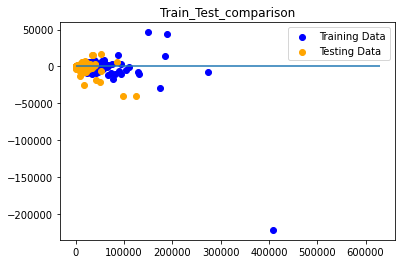

In [85]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train_Test_comparison")
plt.show()

In [86]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(model.predict(X_test[:10]))}')

Actual:		[369, 129, 2149, 1436, 678, 1009, 1069, 11366, 186, 844]
Predicted:	[344.7, 198.3, 2488.5, 1638.1, 561.8, 1388.0, 1249.9, 10691.0, 331.8, 995.0]


# START MODEL TESTING

- A random row was selected to use as baseline values for comparison
- Ran the prediction 5 times
 - each time changing the population of a race by N
- Prints out the change in labor_force

# TEST : Start with a random Baseline as reference

In [87]:
XA = X_test[11:12]
XA

,race_white,race_black,race_asian,race_two_or_more,race_others
geoid,,,,,
54011,82665,4811,1345,4642,887


In [88]:
baselineA = model.predict(XA)[0]
print (f"TEST A : Baseline labor_force before change {baselineA}")

TEST A : Baseline labor_force before change 2860.9


# Change in unemployed when adding to each race

In [95]:
increase_by = 1000

In [96]:
# increase white
X1 = XA.copy()
X1.iat[0,0] = X1.iat[0,0] + increase_by
prediction = model.predict(X1)[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 3101.5, a change of 240.5999999999999


In [97]:
# increase black
X2 = XA.copy()
X2.iat[0,1] = X2.iat[0,1] + increase_by
prediction = model.predict(X2)[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 2860.9, a change of 0.0


In [98]:
# increase asian
X3 = XA.copy()
X3.iat[0,2] = X3.iat[0,2] + increase_by
prediction = model.predict(X3)[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 2826.8, a change of -34.09999999999991


In [99]:
# increase race_two_or_more
X4 = XA.copy()
X4.iat[0,3] = X4.iat[0,3] + increase_by
prediction = model.predict(X4)[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 3204.3, a change of 343.4000000000001


In [94]:
# increase race_others
X5 = XA.copy()
X5.iat[0,4] = X5.iat[0,4] + increase_by
prediction = model.predict(X5)[0]
print(f"Predict labor_force to be {prediction}, a change of {prediction-baselineA}")

Predict labor_force to be 2538.2, a change of -322.7000000000003
